In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [21]:
#reading the file
new_df = pd.read_csv('all_data.csv')
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [22]:
#finding and dropping nan values
df = new_df[['Quantity Ordered','Order Date']]
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())
df = df.dropna(how = 'all')
df.head()

,Quantity Ordered,Order Date
1,NaN,NaN
356,NaN,NaN
735,NaN,NaN
1433,NaN,NaN
1553,NaN,NaN


,Quantity Ordered,Order Date
0,2,04/19/19 08:46
2,1,04/07/19 22:30
3,1,04/12/19 14:38
4,1,04/12/19 14:38
5,1,04/30/19 09:27


In [23]:
#converting date to a vaild mm/dd/yyyy format
df['Date'] = df['Order Date'].str[0:6] + '20' +df['Order Date'].str[6:8]

#dropping an unknown string value
df = df[~df['Date'].isin(['Order 20Da'])]

In [24]:
#converting into a datetime format and then setting it as an index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

#dropping the 'order date' column 
df.drop('Order Date',axis='columns', inplace=True)

In [26]:
#converting the Quantity Ordered into int
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [27]:
df

,Quantity Ordered
Date,
2019-04-19,2
2019-04-07,1
2019-04-12,1
2019-04-12,1
2019-04-30,1
...,...
2019-09-17,3
2019-09-01,1
2019-09-23,1


In [37]:
df.describe()

,Quantity Ordered
count,185950.000000
mean,1.124383
std,0.442793
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


In [38]:
series_value = df.values
type(series_value)

numpy.ndarray

In [34]:
df_mean = df.rolling(window = 99999).mean()

<AxesSubplot:xlabel='Date'>

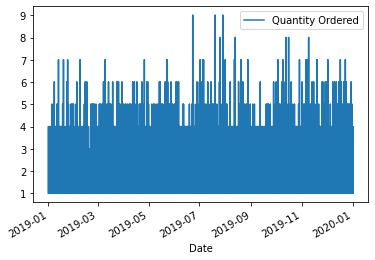

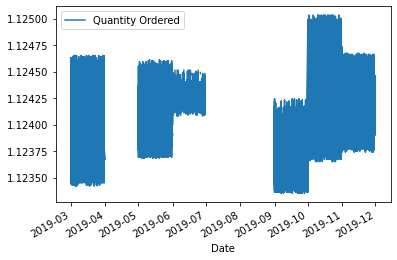

In [35]:
df.plot()
df_mean.plot()

In [39]:
value = pd.DataFrame(series_value)

In [41]:
sale_df = pd.concat([value,value.shift(1)],axis = 1)

In [42]:
sale_df.head()

,0,0
0,2,NaN
1,1,2.0
2,1,1.0
3,1,1.0
4,1,1.0


In [45]:
sale_df.columns = ['Actual_sale','Forecast_sale']
sale_df.head()

,Actual_sale,Forecast_sale
0,2,NaN
1,1,2.0
2,1,1.0
3,1,1.0
4,1,1.0


In [52]:
sale_test = sale_df[1:]

In [58]:
sale_test.head()
sale_test.tail()

,Actual_sale,Forecast_sale
185945,3,1.0
185946,1,3.0
185947,1,1.0
185948,1,1.0
185949,1,1.0


In [55]:
sale_error = mean_squared_error(sale_test.Actual_sale,sale_test.Forecast_sale)

In [56]:
sale_error

0.3920483573452936

In [57]:
np.sqrt(sale_error)

0.6261376504773479

In [63]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#ARIMA (p,d,q)
# Autoregressive (p) Integrated (d) Moving Average (q)

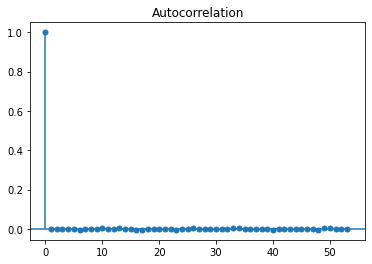

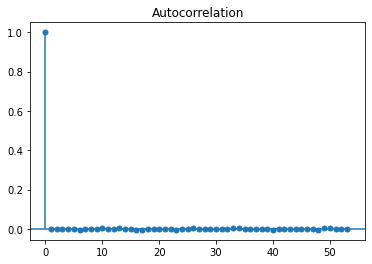

In [61]:
#plot_acf is to identify parameter q
plot_acf(df)

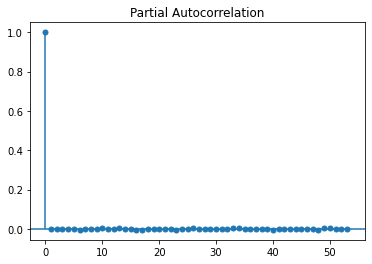

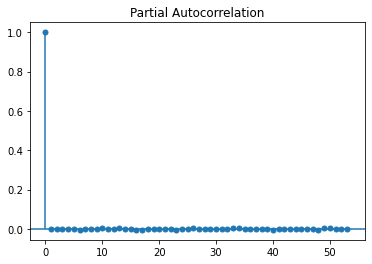

In [62]:
#to identiy the value of p
plot_pacf(df)

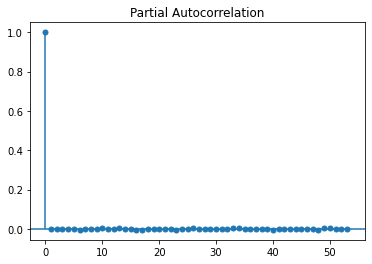

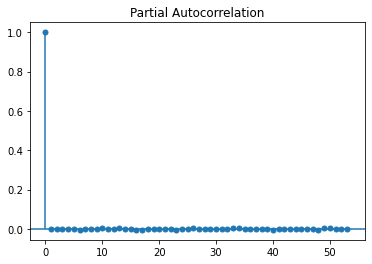

In [68]:
plot_pacf(df)

In [69]:
# p = 2,3 d= 0 & q = 3,4

df.size

185950

In [71]:
df_train = df[0:180000]
df_test = df[180000:185950]

In [72]:
from statsmodels.tsa.arima_model import ARIMA

In [81]:
sale_model = ARIMA(df_train.astype('float32'), order=(0,0,0))

C:\Users\vandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vandi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [82]:
sale_model_fit = sale_model.fit()

In [83]:
sale_model_fit.aic

217328.69524578436

In [84]:
sale_forecast = sale_model_fit.forecast(steps = 35)[0]

In [85]:
sale_forecast

array([1.12400557, 1.12400557, 1.12400557, 1.12400557, 1.12400557,
       1.12400557, 1.12400557, 1.12400557, 1.12400557, 1.12400557,
       1.12400557, 1.12400557, 1.12400557, 1.12400557, 1.12400557,
       1.12400557, 1.12400557, 1.12400557, 1.12400557, 1.12400557,
       1.12400557, 1.12400557, 1.12400557, 1.12400557, 1.12400557,
       1.12400557, 1.12400557, 1.12400557, 1.12400557, 1.12400557,
       1.12400557, 1.12400557, 1.12400557, 1.12400557, 1.12400557])

In [88]:
sale_test.head(50)

,Actual_sale,Forecast_sale
1,1,2.0
2,1,1.0
3,1,1.0
4,1,1.0
5,1,1.0
6,1,1.0
7,1,1.0
8,1,1.0
9,1,1.0
10,1,1.0
